# ASSIGNMENT3_REDDIT APP DATA

# AUTHENTICATION

In [273]:
#importing praw package
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="5FRbgiDqpgtd7_Vv6ekKPQ",
    client_secret="E0-M3cQKRpKisIzziqPLFhUTG6tfYw",
    user_agent=user_agent
)

## IMPORTING PACKAGES

In [274]:
#importing pandas , numpy and regex modules
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## SELECT TRENDING TOPIC FROM REDDIT 

The **"taylorswift"** subreddit channel will be use for this project

In [275]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("taylorswift").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Megathread Hub
14sl7a7
aran130711
1688676194.0
499
0.99
https://www.reddit.com/r/TaylorSwift/comments/14sl7a7/megathread_hub/
0


**GET TOTAL COMMENT IN SUBREDDIT**

In [276]:
#top posts from the "bitcoin" subreddit using PRAW
headlines = set()
for submission in reddit.subreddit("taylorswift").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

657


## SCRAPPED DATA

In [277]:
#Create a dataframe from the scrapped data 
taylor_df = pd.DataFrame(headlines)
taylor_df.head()

,0
0,friendship bracelets - before and after (tokyo...
1,Unexpected Swiftie
2,Lyric Alphabet - J
3,How do you describe that instrumental in Don't...
4,Can someone explain to me why is everybody so ...


## REMOVING UNWANTED COLUMNS

In [278]:
df = taylor_df.iloc[:, 1:]#removes unwanted columns in left
taylor_df.head()

,0
0,friendship bracelets - before and after (tokyo...
1,Unexpected Swiftie
2,Lyric Alphabet - J
3,How do you describe that instrumental in Don't...
4,Can someone explain to me why is everybody so ...


## RETRIEVING COLUMN NAME

In [279]:
#gives the column names
taylor_df.columns

RangeIndex(start=0, stop=1, step=1)

## RENAMING COLUMNS

In [280]:
#renaming the column to titles
taylor_df.columns = ['Titles']

## HEAD METHOD

In [281]:
#Gives first five columns in the dataframe
taylor_df.head()

,Titles
0,friendship bracelets - before and after (tokyo...
1,Unexpected Swiftie
2,Lyric Alphabet - J
3,How do you describe that instrumental in Don't...
4,Can someone explain to me why is everybody so ...


### COUNTING DUPLICATE VALUES

In [282]:
#counts the number of duplicate values in the 'Titles' column
taylor_df.Titles.duplicated().sum() 

0

## TWITTER DATA PREPROCESSING FOR BITCOIN ANALYSIS

In [283]:


#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
taylor_df["Titles"]= taylor_df["Titles"].apply(cleanTxt)

#Show the clean text
taylor_df.head()

,Titles
0,friendship bracelets - before and after (tokyo...
1,Unexpected Swiftie
2,Lyric Alphabet - J
3,How do you describe that instrumental in Don't...
4,Can someone explain to me why is everybody so ...


## REMOVING EMOJI'S AND UNICODE FROM REDDIT DATA FOR ENHANCED ANALYSIS

In [284]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
taylor_df["Titles"]= taylor_df["Titles"].apply(remove_emoji)

#Show the clean text
taylor_df.head()

,Titles
0,friendship bracelets - before and after (tokyo...
1,Unexpected Swiftie
2,Lyric Alphabet - J
3,How do you describe that instrumental in Don't...
4,Can someone explain to me why is everybody so ...


## TEXT ANALYSIS AND VISUALISATION FOR TEXTBLOB AND WORDCLOUD

In [285]:
#importing modules
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

### SENTIMENT ANALYSIS: SUBJECTIVITY AND POLARITY OF TAYLOR RELATED TEXT

In [286]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
taylor_df['Subjectivity'] = taylor_df['Titles'].apply(getSubjectivity)
taylor_df['Polarity'] = taylor_df['Titles'].apply(getPolarity)

#Now display data
taylor_df.head()

,Titles,Subjectivity,Polarity
0,friendship bracelets - before and after (tokyo...,0.000000,0.000000
1,Unexpected Swiftie,1.000000,0.100000
2,Lyric Alphabet - J,0.650000,0.250000
3,How do you describe that instrumental in Don't...,0.400000,0.400000
4,Can someone explain to me why is everybody so ...,0.454545,0.136364


## CATEGORIZING SWIFTIE SENTIMENT

In [287]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
taylor_df["Insight"] = taylor_df["Polarity"].apply(getInsight)

taylor_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,friendship bracelets - before and after (tokyo...,0.000000,0.000000,Neutral
1,Unexpected Swiftie,1.000000,0.100000,Positive
2,Lyric Alphabet - J,0.650000,0.250000,Positive
3,How do you describe that instrumental in Don't...,0.400000,0.400000,Positive
4,Can someone explain to me why is everybody so ...,0.454545,0.136364,Positive
5,What lyric do you constantly mess up?,0.412500,0.037500,Positive
6,"What songs should have been Track 5s, but aren't?",0.000000,0.000000,Neutral
7,"Guitar surprise song, Tokyo, night 2",0.000000,0.000000,Neutral
8,How many times do you listen to an album befor...,0.500000,0.500000,Positive
9,Little Taylor sculpture I made today,0.500000,-0.187500,Negative


## DATA VISUALIZATION

In [288]:
#create visualizations using Seaborn, WordCloud, and Matplotlib with a specific visual style
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### VISUALIZING SWIFTIE SENTIMENT DISTRIBUTION

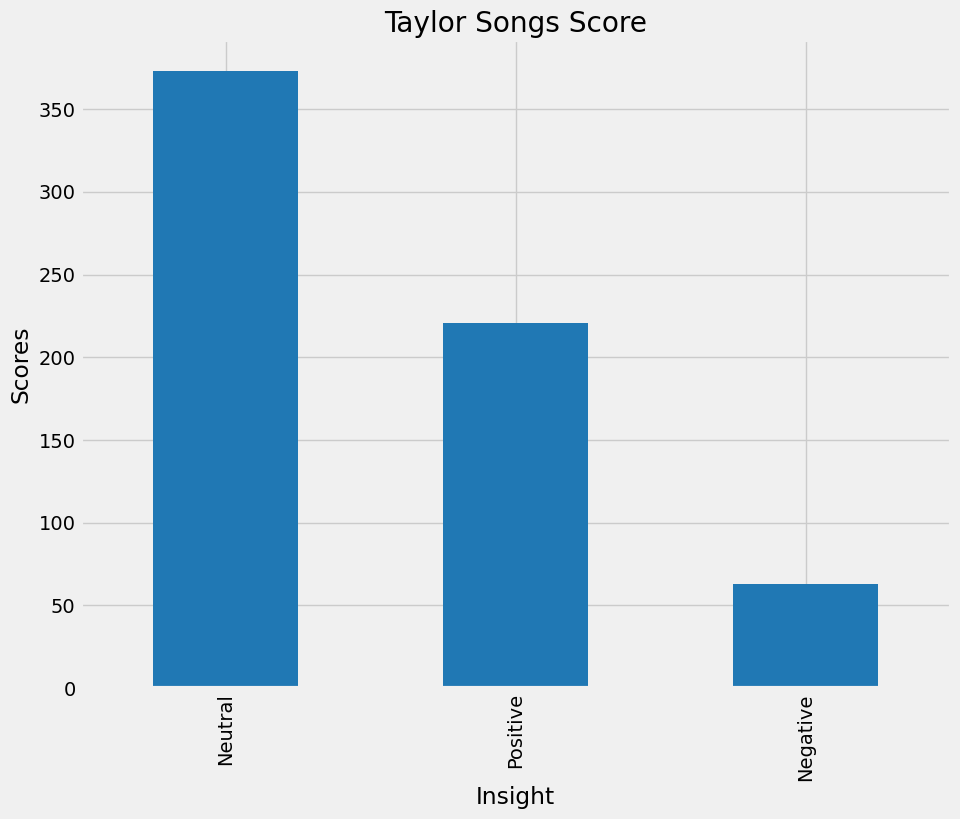

In [289]:
#Plot the values count of sentiment
plt.title("Taylor Songs Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
taylor_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# WORDCLOUD FOR TAYLOR SWIFT

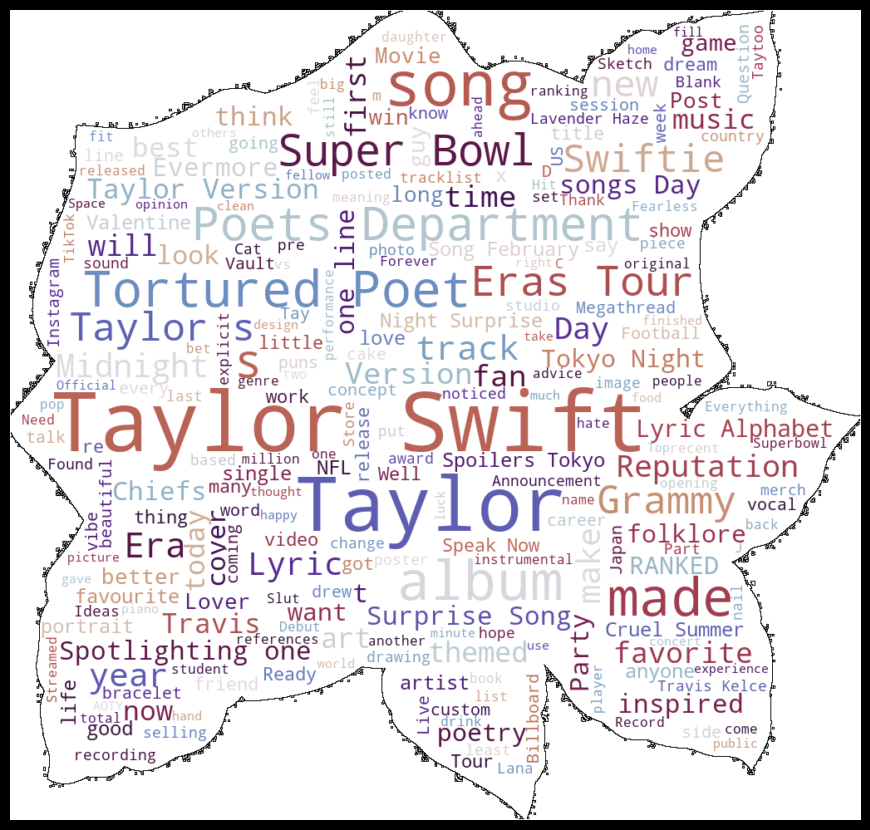

In [290]:
from PIL import Image
import numpy as np

text = ' '.join( [twts for twts in taylor_df['Titles']] ) 

image = Image.open('shape.jpeg')
mask = np.array(image)

max_font_size = 100
min_font_size = 15

wordcloud = WordCloud(width=1000, 
                      height = 600,
                      max_words = 1000,
                      stopwords = STOPWORDS,
                      mask = mask,
                      contour_width = 0.01,
                      colormap = 'twilight',
                      max_font_size = max_font_size,
                      min_font_size = min_font_size,
                      background_color = "white").generate(text)

# Display the generated image:

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
plt.show();

## WORDCLOUD 2

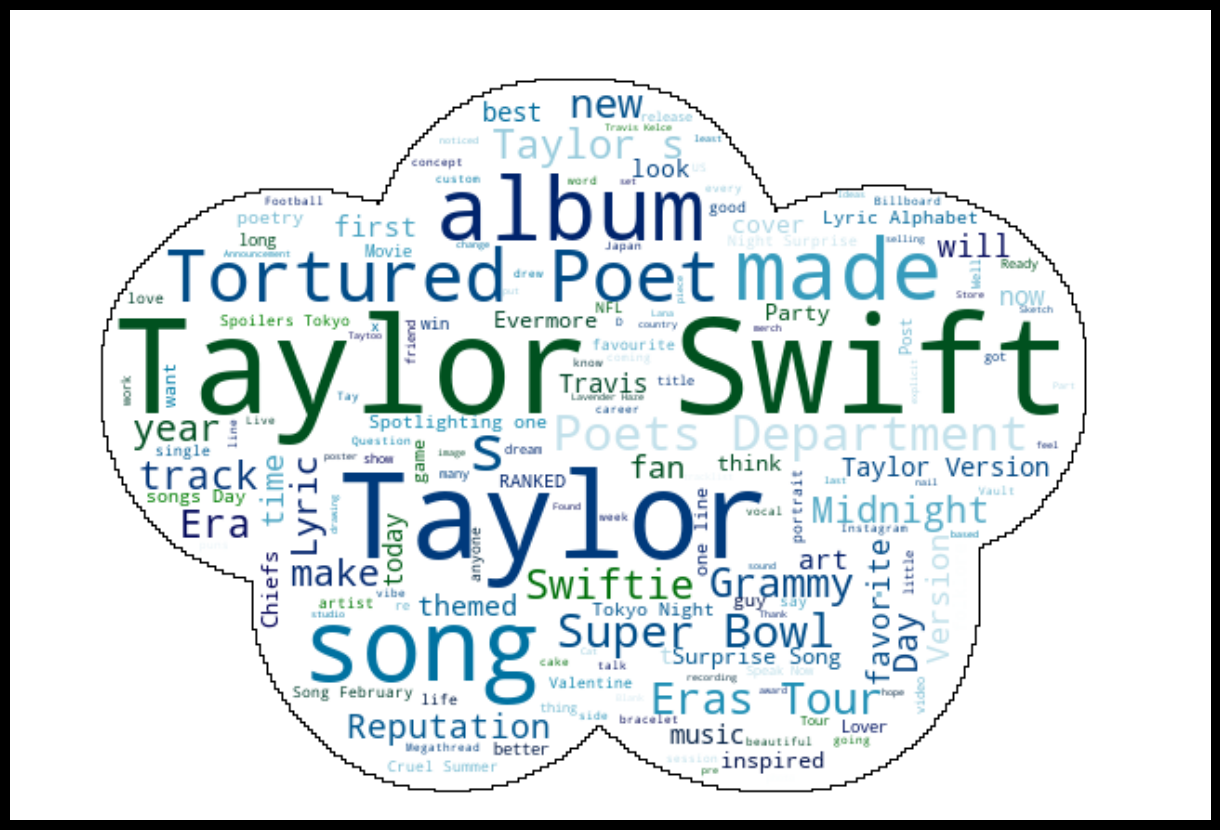

In [291]:
from PIL import Image
import numpy as np

text = ' '.join( [twts for twts in taylor_df['Titles']] ) 

image = Image.open('cloud.png')
mask = np.array(image)

max_font_size = 100
min_font_size = 5

wordcloud = WordCloud(width=1000, 
                      height = 600,
                      max_words = 1000,
                      stopwords = STOPWORDS,
                      mask = mask,
                      contour_width = 0.01,
                      colormap = 'ocean',
                      max_font_size = max_font_size,
                      min_font_size = min_font_size,
                      background_color = "white").generate(text)

# Display the generated image:

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
plt.show();

## EXAMPLE2 : AMAZON

# AUTHENTICATION

In [292]:
#importing praw package
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="5FRbgiDqpgtd7_Vv6ekKPQ",
    client_secret="E0-M3cQKRpKisIzziqPLFhUTG6tfYw",
    user_agent=user_agent
)

## IMPORTING PACKAGES

In [293]:
#importing pandas , numpy and regex modules
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## SELECT TRENDING TOPIC FROM REDDIT 

The **"Amazon"** subreddit channel will be use for this project

In [294]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("amazon").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Weekly Help and Discussion Thread for the week of February 05, 2024
1ajd0j9
AmazonNewsBot
1707127204.0
4
0.84
https://www.reddit.com/r/amazon/comments/1ajd0j9/weekly_help_and_discussion_thread_for_the_week_of/
0


**GET TOTAL COMMENT IN SUBREDDIT**

In [295]:
#top posts from the "bitcoin" subreddit using PRAW
headlines = set()
for submission in reddit.subreddit("amazon").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

112


## SCRAPPED DATA

In [296]:
#Create a dataframe from the scrapped data 
amazon_df = pd.DataFrame(headlines)
amazon_df.head()

,0
0,These smart glasses put Amazon Alexa on my fac...
1,TikTok Shop is taking on Amazon — one viral vi...
2,"Amazon layoffs hit Prime Video, MGM studio, an..."
3,France fines Amazon $35 million over 'excessiv...
4,Teen used savings to start lucrative Amazon si...


## REMOVING UNWANTED COLUMNS

In [297]:
df = amazon_df.iloc[:, 1:]#removes unwanted columns in left
amazon_df.head()

,0
0,These smart glasses put Amazon Alexa on my fac...
1,TikTok Shop is taking on Amazon — one viral vi...
2,"Amazon layoffs hit Prime Video, MGM studio, an..."
3,France fines Amazon $35 million over 'excessiv...
4,Teen used savings to start lucrative Amazon si...


## RETRIEVING COLUMN NAME

In [298]:
#gives the column names
amazon_df.columns

RangeIndex(start=0, stop=1, step=1)

## RENAMING COLUMNS

In [299]:
#renaming the column to titles
amazon_df.columns = ['Titles']

## HEAD METHOD

In [300]:
#Gives first five columns in the dataframe
amazon_df.head()

,Titles
0,These smart glasses put Amazon Alexa on my fac...
1,TikTok Shop is taking on Amazon — one viral vi...
2,"Amazon layoffs hit Prime Video, MGM studio, an..."
3,France fines Amazon $35 million over 'excessiv...
4,Teen used savings to start lucrative Amazon si...


### COUNTING DUPLICATE VALUES

In [301]:
#counts the number of duplicate values in the 'Titles' column
amazon_df.Titles.duplicated().sum()

0

## TWITTER DATA PREPROCESSING FOR BITCOIN ANALYSIS

In [302]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
amazon_df["Titles"]= amazon_df["Titles"].apply(cleanTxt)

#Show the clean text
amazon_df.head()

,Titles
0,These smart glasses put Amazon Alexa on my fac...
1,TikTok Shop is taking on Amazon — one viral vi...
2,"Amazon layoffs hit Prime Video, MGM studio, an..."
3,France fines Amazon $35 million over 'excessiv...
4,Teen used savings to start lucrative Amazon si...


## TEXT ANALYSIS AND VISUALISATION FOR TEXTBLOB AND WORDCLOUD


In [303]:
#importing modules
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

### SENTIMENT ANALYSIS: SUBJECTIVITY AND POLARITY OF AMAZON RELATED TEXT

In [304]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
amazon_df['Subjectivity'] = amazon_df['Titles'].apply(getSubjectivity)
amazon_df['Polarity'] = amazon_df['Titles'].apply(getPolarity)

#Now display data
amazon_df.head()

,Titles,Subjectivity,Polarity
0,These smart glasses put Amazon Alexa on my fac...,0.771429,-0.292857
1,TikTok Shop is taking on Amazon — one viral vi...,0.000000,0.000000
2,"Amazon layoffs hit Prime Video, MGM studio, an...",0.000000,0.000000
3,France fines Amazon $35 million over 'excessiv...,1.000000,-0.250000
4,Teen used savings to start lucrative Amazon si...,0.000000,0.000000


## REMOVING EMOJI'S AND UNICODE FROM REDDIT DATA FOR ENHANCED ANALYSIS


In [305]:
# Next we have to remove emoji & Unicode from the reddit data.

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Cleaning the text
amazon_df["Titles"]= amazon_df["Titles"].apply(remove_emoji)

# Show the clean text
amazon_df.head()

,Titles,Subjectivity,Polarity
0,These smart glasses put Amazon Alexa on my fac...,0.771429,-0.292857
1,TikTok Shop is taking on Amazon — one viral vi...,0.000000,0.000000
2,"Amazon layoffs hit Prime Video, MGM studio, an...",0.000000,0.000000
3,France fines Amazon $35 million over 'excessiv...,1.000000,-0.250000
4,Teen used savings to start lucrative Amazon si...,0.000000,0.000000


## CATEGORIZING AMAZON SENTIMENT

In [306]:
#Group the range of Subjectivity to different categories

def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
amazon_df["Insight"] = amazon_df["Subjectivity"].apply(getInsight)

amazon_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,These smart glasses put Amazon Alexa on my fac...,0.771429,-0.292857,Positive
1,TikTok Shop is taking on Amazon — one viral vi...,0.000000,0.000000,Neutral
2,"Amazon layoffs hit Prime Video, MGM studio, an...",0.000000,0.000000,Neutral
3,France fines Amazon $35 million over 'excessiv...,1.000000,-0.250000,Positive
4,Teen used savings to start lucrative Amazon si...,0.000000,0.000000,Neutral
5,"Let us choose carriers, or set preferences!!",0.000000,0.000000,Neutral
6,Amazon to carry several pro sports teams' game...,0.000000,0.000000,Neutral
7,Amazon Prime Video Orders Series Adaptation of...,0.475000,-0.200000,Positive
8,The 24 best Valentine's Day gifts from Amazon ...,0.300000,1.000000,Positive
9,How Amazon Connects With Fans Through the Powe...,0.000000,0.000000,Neutral


## COLUMNS OF AMAZON

In [307]:
print(amazon_df.columns)

Index(['Titles', 'Subjectivity', 'Polarity', 'Insight'], dtype='object')


## DATA VISUALIZATION

In [308]:
# create visualizations using Seaborn, WordCloud, and Matplotlib with a specific visual style

import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## DATA VISUALIZATION FOR AMAZON

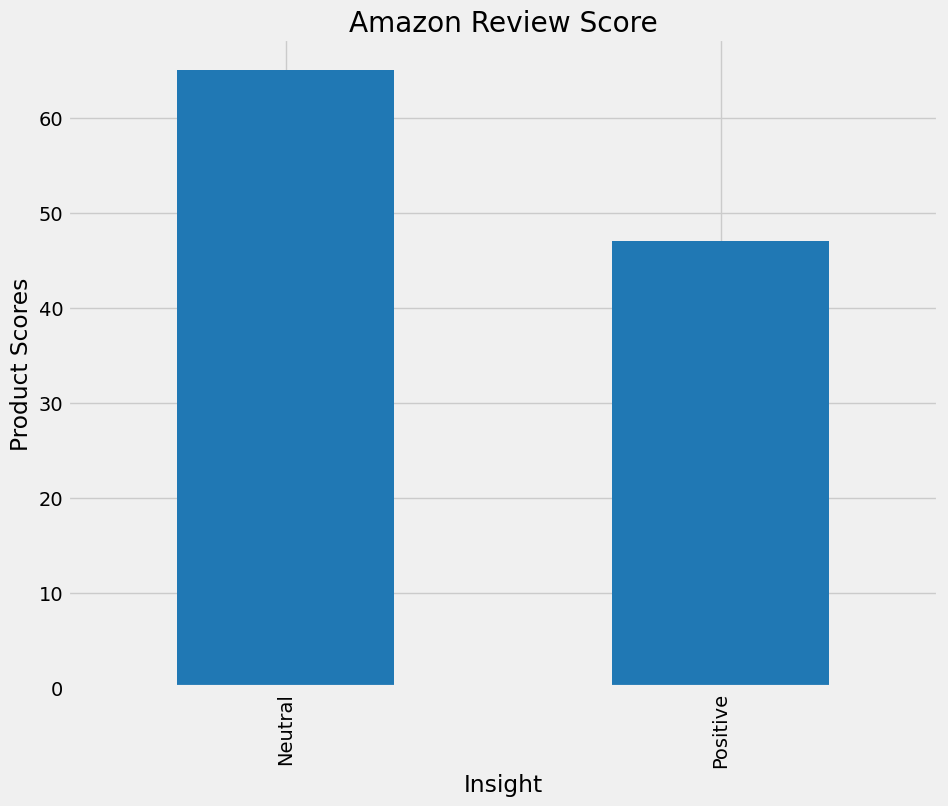

In [309]:
# Plot the values count of sentiment

plt.title("Amazon Review Score")
plt.xlabel("Sentiment")
plt.ylabel("Product Scores")
plt.rcParams["figure.figsize"] = (10,8)
amazon_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# WORDCLOUD FOR AMAZON

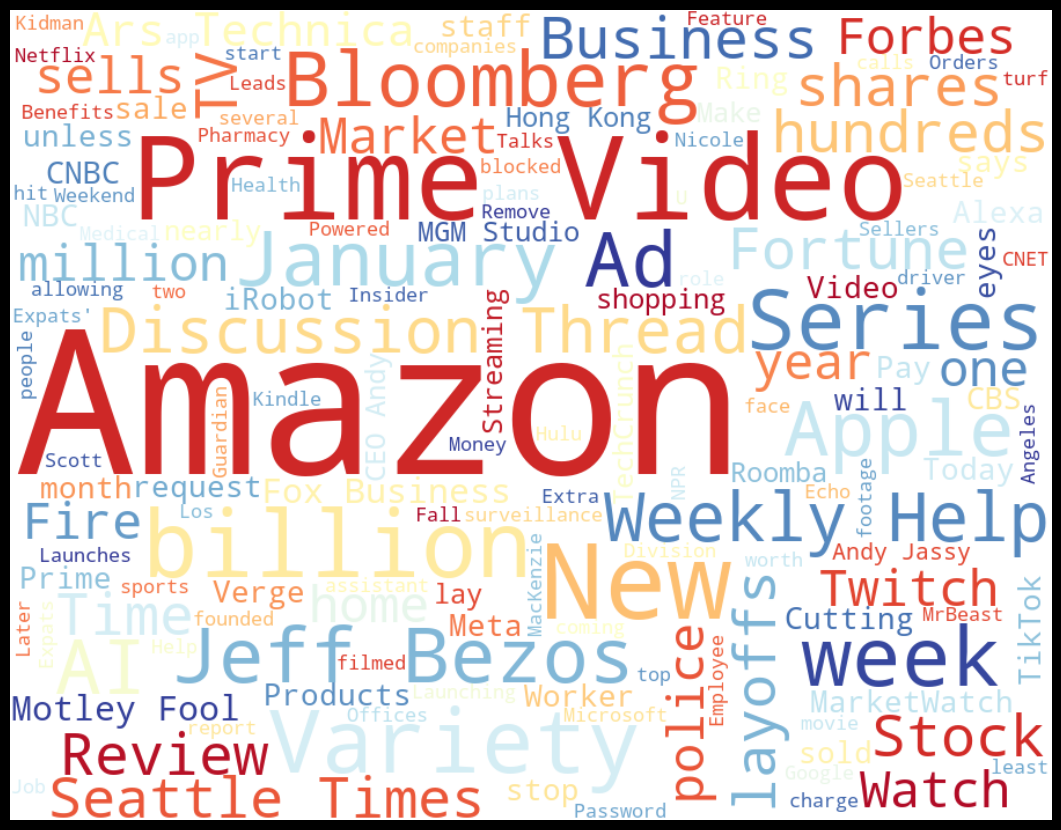

In [310]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming 'Titles' column exists in amazon_df
text = ' '.join([str(twts) for twts in amazon_df['Titles']])

# Generate word cloud with the default rectangular shape
wordcloud = WordCloud(width=900, height=700,
                      max_words=150,
                      stopwords=STOPWORDS,
                      contour_width=0.1,
                      colormap='RdYlBu',
                      background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(20, 10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## WORDCLOUD 2

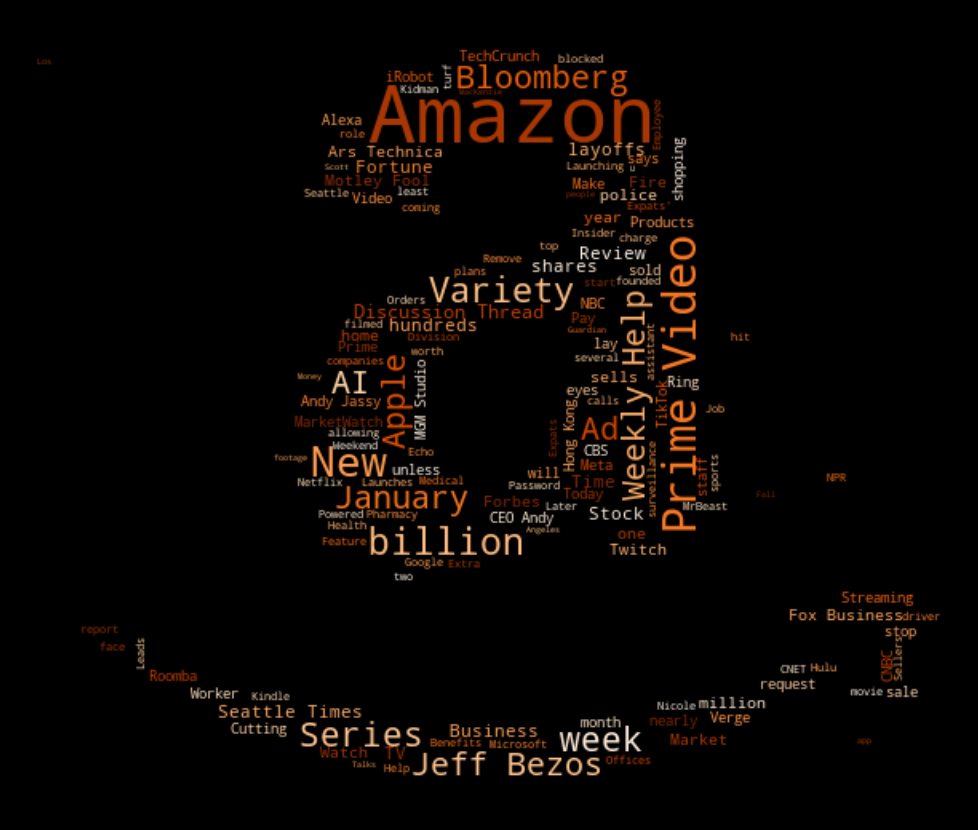

In [311]:
from PIL import Image
import numpy as np

text = ' '.join( [twts for twts in amazon_df['Titles']] )
image = Image.open('amazon.png')
mask = np.array(image)

max_font_size = 100
min_font_size = 2

wordcloud = WordCloud(width=1000, 
                      height = 800,
                      max_words = 150,
                      stopwords = STOPWORDS,
                      mask = mask,
                      contour_width = 0.1,
                      colormap = 'Oranges',
                      max_font_size=max_font_size,
                      min_font_size=min_font_size,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
plt.show();